# Import libraries

In [ ]:
import time
import warnings

from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill

# Helper Functions

# Datasets

In [ ]:
RNASeq_path = 'AdjustedRPKMOutput/RNASeq.txt' 
RPF_path = 'RPKMOutput/RPF.txt'
RNASeq = pd.read_csv(RNASeq_path, sep='\t')
RPF = pd.read_csv(RPF_path, sep='\t')


In [ ]:
RNASeq = RNASeq[(RNASeq['cdReads0'] >= 10) & (RNASeq['cdReads1'] >= 10) & (RNASeq['cdReads2'] >= 10)& (RNASeq['cdReads3'] >= 10)& (RNASeq['cdReads4'] >= 10)]
RPF = RPF[(RPF['cdReads0'] >= 10) & (RPF['cdReads1'] >= 10) & (RPF['cdReads2'] >= 10)& (RPF['cdReads3'] >= 10)& (RPF['cdReads4'] >= 10)]

In [ ]:
RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [ ]:
RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [ ]:
RNASeq['log2cdRPKM1']=RNASeq['cdRPKM1']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM2']=RNASeq['cdRPKM2']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM3']=RNASeq['cdRPKM3']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM4']=RNASeq['cdRPKM4']-RNASeq['cdRPKM0']

In [ ]:
RPF['log2cdRPKM1']=RPF['cdRPKM1']-RPF['cdRPKM0']
RPF['log2cdRPKM2']=RPF['cdRPKM2']-RPF['cdRPKM0']
RPF['log2cdRPKM3']=RPF['cdRPKM3']-RPF['cdRPKM0']
RPF['log2cdRPKM4']=RPF['cdRPKM4']-RPF['cdRPKM0']

In [ ]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]

In [ ]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,filteredRNASeq])

In [ ]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]

In [ ]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [ ]:
TE.to_csv('/Users/akankshitadash/Desktop/TE.txt',sep='\t',index=False)

In [2]:
TE = pd.read_csv('AdjustedRPKMOutput/TE_chrE_filtered.txt',sep='\t')

In [3]:
TE.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.318009,1.243997,1.416672,1.717463,1.757317,-0.074012,0.098663,0.399454,0.439308
1,NM_001003803,ATP5S,1.904575,1.918597,2.401017,2.690534,2.385348,0.014021,0.496441,0.785959,0.480773
2,NM_001003800,BICD2,-0.212253,-0.326054,-0.394399,-0.043000,0.203561,-0.113801,-0.182145,0.169253,0.415814
3,NM_016647,THEM6,0.057710,0.211936,0.366747,0.714460,0.559378,0.154226,0.309037,0.656751,0.501668
4,NM_016640,MRPS30,0.562779,0.555941,0.268715,0.379276,0.831364,-0.006838,-0.294065,-0.183503,0.268585


In [4]:
X = TE[['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']].values

In [5]:
def plot_BIC(list_k, BIC_score,variance):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC for '+ variance)
#     plt.savefig('/Users/akankshitadash/Desktop/GMM/BIC')
    plt.show()

In [6]:
X[:5]

array([[-0.07401217,  0.09866302,  0.39945379,  0.43930829],
       [ 0.01402116,  0.49644131,  0.78595908,  0.48077312],
       [-0.11380078, -0.18214544,  0.16925337,  0.41581401],
       [ 0.15422606,  0.30903723,  0.65675074,  0.50166835],
       [-0.00683842, -0.29406455, -0.18350315,  0.26858466]])

In [ ]:
df = pd.read_csv('AdjustedRPKMOutput/TE_chrE.txt',sep='\t')

In [ ]:
df.head()

In [ ]:
df.keys()

In [ ]:
X = df[['TE0', 'TE1', 'TE2', 'TE3', 'TE4']].values

# Determine optimal K for different covariance settings

In [ ]:
list_k = range(2,21)
variances = ['diag','tied','full'] #'spherical','diag','tied',
for var in variances:
    BIC_score = []
    for i in list_k:
        gmm = GMM(n_components=i, covariance_type=var,n_init=15) #,n_init=15
        gmm.fit(X)
        BIC_score.append(-gmm.bic(X))
    plot_BIC(list_k,BIC_score,var)
    print("Max BIC occurs at K =",BIC_score.index(max(BIC_score))+2)

In [ ]:
# Check BIC/Log likelihood

In [ ]:
TE.keys()

# Plot for diag

1411
1411 1411
2743
2743 2743
525
525 525
963
963 963
2634
2634 2634
826
826 826
735
735 735
260
260 260
1187
1187 1187
2350
2350 2350
596
596 596
774
774 774
247
247 247
1026
1026 1026
649
649 649


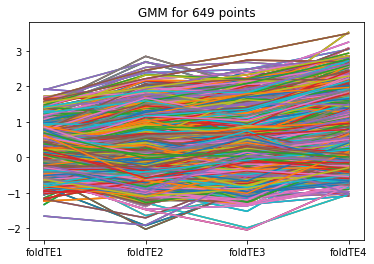

In [11]:
K = [4,5,6]
for k in K:
    gmm = GMM(n_components=k, covariance_type='full',n_init=15)
    gmm.fit(X)
    X_predicted = [ [] for i in range(k)]

    for x in X:
        X_predicted[gmm.predict([x])[0]].append(x)
    var_plot_list = ['foldTE1','foldTE2', 'foldTE3', 'foldTE4']

    for idx,cluster in enumerate(X_predicted):
        fig = plt.subplot(111)
        for points in cluster:
            fig.plot(var_plot_list,points)
        title = "GMM for "+str(len(cluster)) + " points"
        plt.title(title)
        plt.savefig('/Users/akankshitadash/Desktop/GMM/'+str(k)+'/Cluster'+str(idx+1))

    for idx,cluster in enumerate(X_predicted):
        print(len(cluster))
        genes=[]
        acc_nums=[]
        for row in cluster:
            temp = TE.loc[(TE['foldTE1'] == row[0])& (TE['foldTE2']== row[1]) & (TE['foldTE3']== row[2])]
            if(not temp.empty):
                genes.append(temp['GeneName'].values[0])
                acc_nums.append(temp['AccNum'].values[0])
        print(len(cluster),len(genes))
        with open('/Users/akankshitadash/Desktop/GMM/'+str(k)+'/Gene'+str(idx+1)+'.txt','w') as f:
            for gene in genes:
                f.write("%s\n" % gene)
        with open('/Users/akankshitadash/Desktop/GMM/'+str(k)+'/AccNum'+str(idx+1)+'.txt','w') as f:
            for acc_num in acc_nums:
                f.write("%s\n" % acc_num)